<a href="https://www.kaggle.com/code/mikedelong/python-year-price-scatter?scriptVersionId=139914549" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/art-price-dataset/artDataset.csv').drop(columns=['Unnamed: 0'])
df[['price_amount', 'price_currency']] = df['price'].str.split(pat=' ', n=1, expand=True)
df['price_amount'] = 1000 * df['price_amount'].astype(float)
# df['filename'] = df.index.apply(func=lambda x: 'arg/')

df.head()

,price,artist,title,yearCreation,signed,condition,period,movement,price_amount,price_currency
0,28.500 USD,Tommaso Ottieri,Bayreuth Opera,2021,Signed on verso,This work is in excellent condition.,Contemporary,Baroque,28500.0,USD
1,3.000 USD,Pavel Tchelitchew,Drawings of the Opera,First Half 20th Century,Signed and titled,Not examined out of frame.No obvious signs of ...,Post-War,Surrealism,3000.0,USD
2,5.000 USD,Leo Gabin,Two on Sidewalk,2016,"Signed, titled and dated on verso",This work is in excellent condition.,Contemporary,Abstract,5000.0,USD
3,5.000 USD,Matthias Dornfeld,Blumenszene,2010,"Signed, titled and dated on the reverse with t...",This work is in excellent condition.There is m...,Contemporary,Abstract,5000.0,USD
4,2.500 USD,Alexis Marguerite Teplin,Feverish Embarkation,2001,Signed on verso,This work is in excellent condition.,Contemporary,Abstract,2500.0,USD


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           754 non-null    object 
 1   artist          753 non-null    object 
 2   title           754 non-null    object 
 3   yearCreation    754 non-null    object 
 4   signed          754 non-null    object 
 5   condition       754 non-null    object 
 6   period          754 non-null    object 
 7   movement        754 non-null    object 
 8   price_amount    754 non-null    float64
 9   price_currency  754 non-null    object 
dtypes: float64(1), object(9)
memory usage: 59.0+ KB


In [3]:
df['yearCreation'].unique()
[year for year in df['yearCreation'].unique() if not year.isnumeric()]

['First Half 20th Century ',
 '[nan]',
 '1992 - 2004',
 'Mid 20th Century ',
 'Second Half 20th Century ',
 '19th Century ',
 'Circa 1970 - 1979',
 'Circa 1877',
 'Second Half 19th Century ',
 'Circa 1925',
 '1961, printed in 2010',
 '3D printed using ABS, PLA plastics, resin, automobile paints, etched brass, dry transfers, acrylic mirror, batik fabric, quartz clock',
 '1992 - 1993',
 'Late 20th Century ',
 '2002 - 2020',
 '1965 - 2018',
 '1996-2003',
 'Late 19th Century ',
 '2004 - 2006',
 '1960 - 1969',
 'Circa 1971',
 '2006 - 2007',
 'Circa 1970',
 '1996 - 2009',
 '2007 - 2011',
 '20th Century ',
 '1998 / 2011',
 '1962 - 1963',
 'Circa 1980',
 'Circa 1900',
 'Early 20th Century ',
 'Circa 1930 - 1939',
 '1890 - 1899',
 'Circa 1941',
 'Printed 1984',
 'Circa 1930',
 '1911 - 1915',
 '1921 - 1929',
 '1990 - 1999',
 '21st Century ',
 '1987 - 1989',
 'Circa 1987',
 'Circa 1989',
 'Circa 1983',
 'Circa 1991',
 'Circa 2001',
 'Circa 1964']

In [4]:
from numpy import nan
def clean_year_creation(arg):
    if not isinstance(arg, str): 
        return nan
    if arg.isnumeric():
        return float(arg)
    if 'Circa' in arg and len(arg.split()) == 2:
        return float(arg.replace('Circa', ''))
    return nan

df['clean_year_creation'] = df['yearCreation'].apply(clean_year_creation)
df['clean_year_creation'].unique()

array([2021.,   nan, 2016., 2010., 2001., 1977., 2007., 1993., 2014.,
       1973., 2008., 2015., 2012., 2002., 1992., 2020., 1991., 2018.,
       1920., 2003., 2000., 2005., 1999., 1958., 1877., 2004., 2013.,
       2006., 1990., 1925., 1935., 1928., 2022., 1994., 1996., 2017.,
       2019., 2011., 1948., 1971., 1960., 1972., 1984., 1981., 1976.,
       1950., 1896., 1975., 1968., 1970., 1969., 1998., 1940., 1988.,
       1892., 1947., 1995., 1980., 1997., 1983., 1959., 1965., 1939.,
       1964., 1952., 1930., 1949., 1978., 1955., 1961., 1957., 2009.,
       1986., 1985., 1900., 1967., 1974., 1989., 1894., 1941., 1962.,
       1936., 1953., 1943., 1946., 1937., 1944., 1987., 1979., 1982.,
       1931., 1954.])

In [5]:
df['filename'] = ['../input/art-price-dataset/artDataset/image_{}.png'.format(index) for index in range(1, df.shape[0] + 1)]
df.head()

,price,artist,title,yearCreation,signed,condition,period,movement,price_amount,price_currency,clean_year_creation,filename
0,28.500 USD,Tommaso Ottieri,Bayreuth Opera,2021,Signed on verso,This work is in excellent condition.,Contemporary,Baroque,28500.0,USD,2021.0,../input/art-price-dataset/artDataset/image_1.png
1,3.000 USD,Pavel Tchelitchew,Drawings of the Opera,First Half 20th Century,Signed and titled,Not examined out of frame.No obvious signs of ...,Post-War,Surrealism,3000.0,USD,NaN,../input/art-price-dataset/artDataset/image_2.png
2,5.000 USD,Leo Gabin,Two on Sidewalk,2016,"Signed, titled and dated on verso",This work is in excellent condition.,Contemporary,Abstract,5000.0,USD,2016.0,../input/art-price-dataset/artDataset/image_3.png
3,5.000 USD,Matthias Dornfeld,Blumenszene,2010,"Signed, titled and dated on the reverse with t...",This work is in excellent condition.There is m...,Contemporary,Abstract,5000.0,USD,2010.0,../input/art-price-dataset/artDataset/image_4.png
4,2.500 USD,Alexis Marguerite Teplin,Feverish Embarkation,2001,Signed on verso,This work is in excellent condition.,Contemporary,Abstract,2500.0,USD,2001.0,../input/art-price-dataset/artDataset/image_5.png


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                754 non-null    object 
 1   artist               753 non-null    object 
 2   title                754 non-null    object 
 3   yearCreation         754 non-null    object 
 4   signed               754 non-null    object 
 5   condition            754 non-null    object 
 6   period               754 non-null    object 
 7   movement             754 non-null    object 
 8   price_amount         754 non-null    float64
 9   price_currency       754 non-null    object 
 10  clean_year_creation  666 non-null    float64
 11  filename             754 non-null    object 
dtypes: float64(2), object(10)
memory usage: 70.8+ KB


<Axes: ylabel='Frequency'>

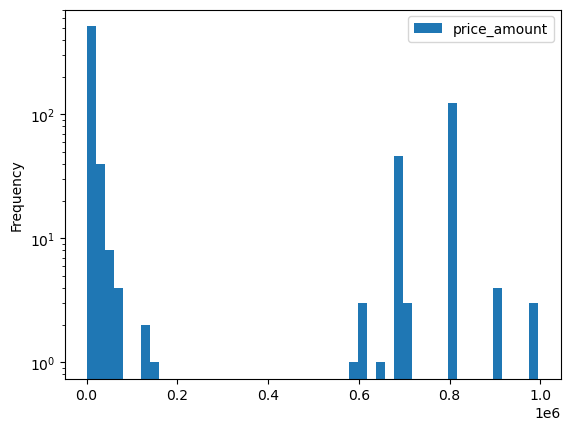

In [7]:
df[['price_amount']].plot.hist(bins=50, log=True)

<Axes: ylabel='Frequency'>

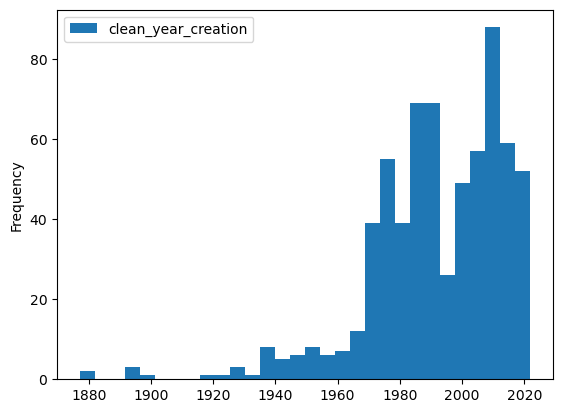

In [8]:
df[['clean_year_creation']].plot.hist(bins=30)

In [9]:
df['movement'].nunique()

34

In [10]:
import plotly.express as px

px.scatter(df[df['movement'] != '[nan]'], x='clean_year_creation', y='price_amount', hover_name='title', hover_data=['artist', 'period', 'movement'],
    color='movement',  color_discrete_sequence= px.colors.qualitative.Alphabet, height=800).update_yaxes(type='log', ).show()

That cluster of paintings with prices over a half million looks so odd; is it really clustered as tightly as it looks?

In [11]:
px.scatter(df[(df['movement'] != '[nan]') & (df['price_amount'] > 200000)], x='clean_year_creation', y='price_amount', hover_name='title', hover_data=['artist', 'period', 'movement'],
                color='movement',  color_discrete_sequence= px.colors.qualitative.Alphabet, height=800).update_yaxes(type='log', ).show()

(yes)